#### hello boys

In [73]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import holidays

In [74]:
df=pd.read_csv('./data/dehli_energy.csv')
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393440 entries, 0 to 393439
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    393440 non-null  int64  
 1   datetime      393440 non-null  object 
 2   Power demand  393440 non-null  float64
 3   temp          393440 non-null  float64
 4   dwpt          393440 non-null  float64
 5   rhum          393440 non-null  float64
 6   wdir          392900 non-null  float64
 7   wspd          393440 non-null  float64
 8   pres          393440 non-null  float64
 9   year          393440 non-null  int64  
 10  month         393440 non-null  int64  
 11  day           393440 non-null  int64  
 12  hour          393440 non-null  int64  
 13  minute        393440 non-null  int64  
 14  moving_avg_3  393438 non-null  float64
dtypes: float64(8), int64(6), object(1)
memory usage: 45.0+ MB


In [76]:
df.describe()   

,Unnamed: 0,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
count,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,392900.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393440.000000,393438.000000
mean,196719.500000,3960.736469,25.527913,16.338046,63.435767,163.777081,7.854550,1008.932695,2022.487129,6.446991,15.745171,11.184371,27.354959,3960.746273
std,113576.489292,1300.473773,7.981563,7.377440,24.850663,116.888397,5.664314,6.902759,1.110587,3.412654,8.783091,6.797501,17.223877,1299.545642
min,0.000000,1302.080000,4.000000,-8.600000,5.000000,0.000000,0.000000,989.600000,2021.000000,1.000000,1.000000,0.000000,0.000000,1307.680000
25%,98359.750000,3074.900000,20.000000,10.400000,44.000000,50.000000,5.400000,1003.000000,2021.000000,3.000000,8.000000,5.000000,10.000000,3075.861667
50%,196719.500000,3832.320000,27.000000,15.400000,67.000000,160.000000,7.600000,1009.000000,2022.000000,6.000000,16.000000,11.000000,25.000000,3831.728333
75%,295079.250000,4870.465000,31.000000,23.900000,84.000000,270.000000,11.200000,1015.000000,2023.000000,9.000000,23.000000,17.000000,40.000000,4869.906667
max,393439.000000,8631.530000,46.400000,30.300000,100.000000,360.000000,63.000000,1027.000000,2024.000000,12.000000,31.000000,23.000000,55.000000,8598.126667


In [77]:
df.isnull().sum()   

Unnamed: 0        0
datetime          0
Power demand      0
temp              0
dwpt              0
rhum              0
wdir            540
wspd              0
pres              0
year              0
month             0
day               0
hour              0
minute            0
moving_avg_3      2
dtype: int64

In [78]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [79]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [80]:
df = df.groupby(df["datetime"].dt.floor("H")).agg({
    "Power demand": "sum",  
    "temp": "mean"
}).reset_index()

df["datetime"] = df["datetime"].dt.strftime("%Y-%m-%d %H:00")

df["datetime"] = pd.to_datetime(df["datetime"])  # back to datetime for extraction
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["date"] = df["datetime"].dt.day
df["day"] = df["datetime"].dt.dayofweek


C:\Users\hanam\AppData\Local\Temp\ipykernel_14508\245227638.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.groupby(df["datetime"].dt.floor("H")).agg({


In [81]:
df.isnull().sum()

datetime        0
Power demand    0
temp            0
year            0
month           0
date            0
day             0
dtype: int64

In [82]:
df.head()

,datetime,Power demand,temp,year,month,date,day
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4


In [83]:
df["is_weekend"] = df["day"].apply(lambda x: 1 if x in [5, 6] else 0)

In [84]:
df.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0


In [85]:
indian_holidays = holidays.India(years=range(2021,2024))

# Create a new column indicating holiday or not
df["is_holiday"] = df["datetime"].dt.date.isin(indian_holidays)
df["is_holiday"] = df["is_holiday"].apply(lambda x: 1 if x else 0)

print(df.head(50).columns)

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday'],
      dtype='object')


In [86]:
df_demo = df[(df["year"] == 2021) & (df["month"] == 1) & (df["date"] == 26)]
df_demo.head()

,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday
599,2021-01-26 00:00:00,24259.05,10.5,2021,1,26,1,0,1
600,2021-01-26 01:00:00,21242.33,9.5,2021,1,26,1,0,1
601,2021-01-26 02:00:00,19843.96,9.1,2021,1,26,1,0,1
602,2021-01-26 03:00:00,19192.37,9.1,2021,1,26,1,0,1
603,2021-01-26 04:00:00,19808.41,8.5,2021,1,26,1,0,1


In [87]:
df_2021 = df[(df["year"] == 2021)]
monthly_df_2021 = df_2021.groupby(by="month").agg({
    "Power demand": "sum",
    "temp": "mean"  
}).reset_index()
monthly_df_2021

,month,Power demand,temp
0,1,28851854.54,12.867139
1,2,22293879.30,18.596414
2,3,27154671.14,24.816944
3,4,25838875.32,29.222153
4,5,27184997.88,30.552868
5,6,34513677.93,32.206883
6,7,33094883.97,31.681422
7,8,36513004.46,30.375448
8,9,32455879.90,28.624253
9,10,27175182.48,26.241963


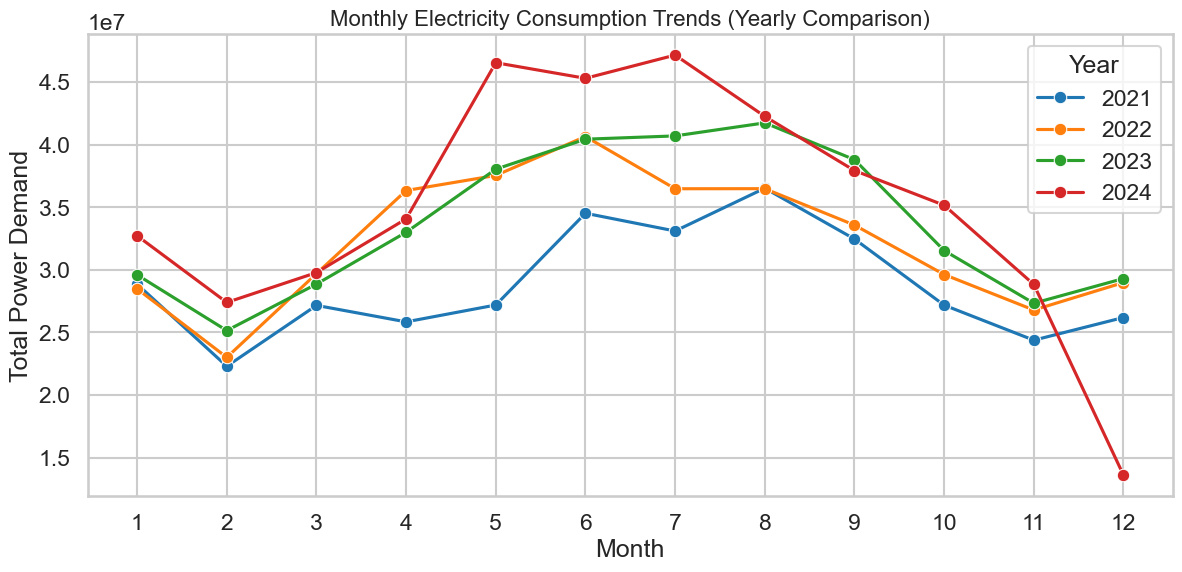

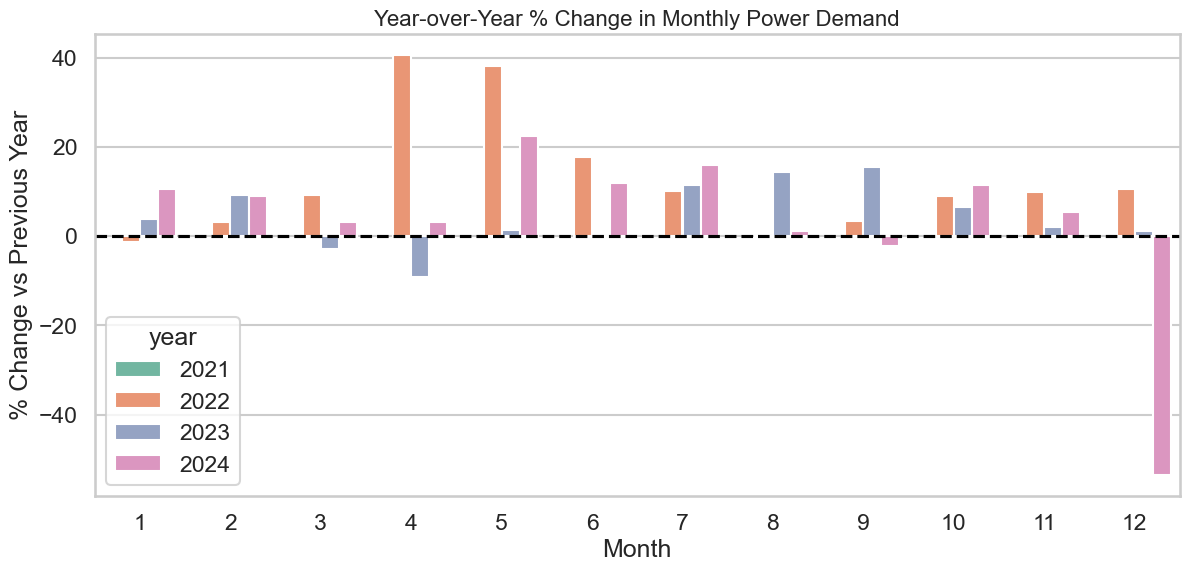

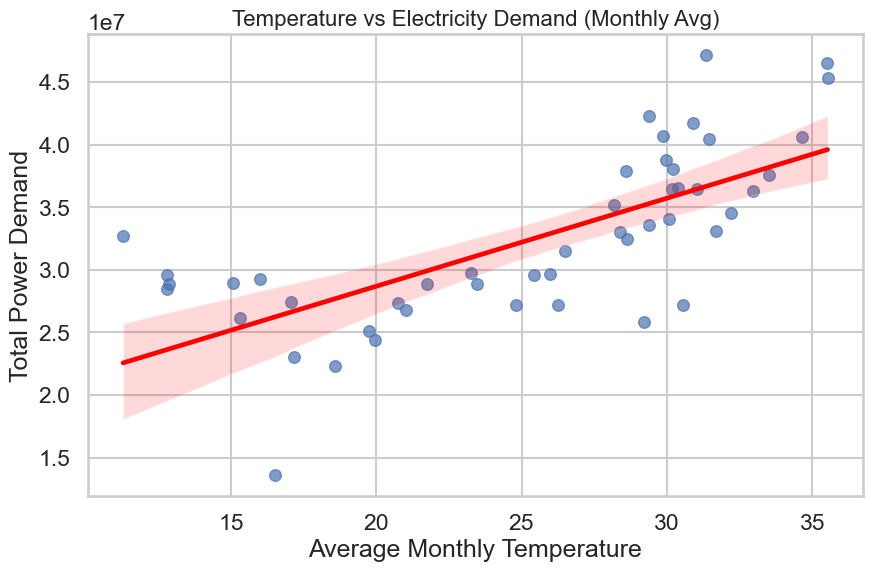

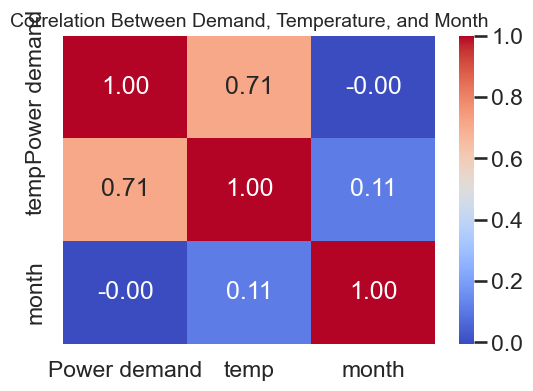

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 📌 Setup
sns.set(style="whitegrid", context="talk")

# --- 1️⃣ Group data by year + month ---
monthly_df = (
    df.groupby(["year", "month"])
    .agg({
        "Power demand": "sum",
        "temp": "mean"
    })
    .reset_index()
)

# --- 2️⃣ Line plot: Monthly consumption trends ---
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_df,
    x="month", y="Power demand", hue="year", marker="o", palette="tab10"
)
plt.title("Monthly Electricity Consumption Trends (Yearly Comparison)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Power Demand")
plt.legend(title="Year")
plt.xticks(range(1, 13))
plt.show()

# --- 4️⃣ YoY % change per month ---
monthly_df["pct_change"] = monthly_df.groupby("month")["Power demand"].pct_change() * 100
plt.figure(figsize=(14, 6))
sns.barplot(
    data=monthly_df, x="month", y="pct_change", hue="year", palette="Set2"
)
plt.title("Year-over-Year % Change in Monthly Power Demand", fontsize=16)
plt.xlabel("Month")
plt.ylabel("% Change vs Previous Year")
plt.axhline(0, color="black", linestyle="--")
plt.show()

# --- 7️⃣ Temperature vs Demand correlation ---
plt.figure(figsize=(10, 6))
sns.regplot(
    data=monthly_df, x="temp", y="Power demand", scatter_kws={"s": 70, "alpha": 0.7},
    line_kws={"color": "red"}
)
plt.title("Temperature vs Electricity Demand (Monthly Avg)", fontsize=16)
plt.xlabel("Average Monthly Temperature")
plt.ylabel("Total Power Demand")
plt.show()

# --- 8️⃣ Correlation heatmap (temp vs demand vs month) ---
corr = monthly_df[["Power demand", "temp", "month"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Demand, Temperature, and Month", fontsize=14)
plt.show()

In [89]:
# ===== ADVANCED FEATURE ENGINEERING FOR BETTER PREDICTION ACCURACY =====

# 1. Create time-based features
df['hour'] = df['datetime'].dt.hour
df['quarter'] = df['datetime'].dt.quarter
df['week_of_year'] = df['datetime'].dt.isocalendar().week

# 2. Create cyclical features (important for time series)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 3. Lag features (previous values impact current demand)
df = df.sort_values('datetime').reset_index(drop=True) 
for lag in [1,24]:  # 1h, 2h, 3h, 6h, 12h, 1day, 1week lags
    df[f'power_lag_{lag}'] = df['Power demand'].shift(lag)
    df[f'temp_lag_{lag}'] = df['temp'].shift(lag)

# 4. Rolling statistics (trend and seasonality indicators)
for window in [3,24]:  
    df[f'power_rolling_mean_{window}'] = df['Power demand'].rolling(window=window, min_periods=1).mean()
    

# 5. Interaction features
df['temp_hour_interaction'] = df['temp'] * df['hour']

df.fillna(method='bfill', inplace=True)
df.head()

C:\Users\hanam\AppData\Local\Temp\ipykernel_14508\3692701957.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,datetime,Power demand,temp,year,month,date,day,is_weekend,is_holiday,hour,...,day_cos,month_sin,month_cos,power_lag_1,temp_lag_1,power_lag_24,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,temp_hour_interaction
0,2021-01-01 00:00:00,11853.25,8.0,2021,1,1,4,0,0,0,...,-0.900969,0.5,0.866025,11853.25,8.0,11853.25,8.0,11853.250000,11853.250,0.0
1,2021-01-01 01:00:00,21667.08,8.0,2021,1,1,4,0,0,1,...,-0.900969,0.5,0.866025,11853.25,8.0,11853.25,8.0,16760.165000,16760.165,8.0
2,2021-01-01 02:00:00,19990.97,7.5,2021,1,1,4,0,0,2,...,-0.900969,0.5,0.866025,21667.08,8.0,11853.25,8.0,17837.100000,17837.100,15.0
3,2021-01-01 03:00:00,19287.98,7.0,2021,1,1,4,0,0,3,...,-0.900969,0.5,0.866025,19990.97,7.5,11853.25,8.0,20315.343333,18199.820,21.0
4,2021-01-01 04:00:00,20118.34,6.5,2021,1,1,4,0,0,4,...,-0.900969,0.5,0.866025,19287.98,7.0,11853.25,8.0,19799.096667,18583.524,26.0


In [90]:
df.columns

Index(['datetime', 'Power demand', 'temp', 'year', 'month', 'date', 'day',
       'is_weekend', 'is_holiday', 'hour', 'quarter', 'week_of_year',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'power_lag_1', 'temp_lag_1', 'power_lag_24', 'temp_lag_24',
       'power_rolling_mean_3', 'power_rolling_mean_24',
       'temp_hour_interaction'],
      dtype='object')

In [91]:
# Keep only the specified features
selected_features = [
    'Power demand',
    'temp',
    'year', 
    'month', 
    'date', 
    'day',
    'datetime',
    'is_weekend',
    'is_holiday',
    'power_lag_1',
    'power_lag_24',
    'temp_lag_1',
    'temp_lag_24',
    'power_rolling_mean_3',
    'power_rolling_mean_24',
    'hour_sin',
    'hour_cos',
    'day_sin',
    'day_cos',
    'month_sin',
    'month_cos'
]

# Check which features exist in the dataframe
existing_features = [col for col in selected_features if col in df.columns]
missing_features = [col for col in selected_features if col not in df.columns]

print("Features that exist in the dataframe:")
for feature in existing_features:
    print(f"  ✓ {feature}")

if missing_features:
    print("\nFeatures that are missing from the dataframe:")
    for feature in missing_features:
        print(f"  ✗ {feature}")

# Filter the dataframe to keep only existing features
df = df[existing_features].copy()

print(f"\nDataframe shape after filtering: {df.shape}")
print(f"Final columns: {list(df.columns)}")
df.head()

Features that exist in the dataframe:
  ✓ Power demand
  ✓ temp
  ✓ year
  ✓ month
  ✓ date
  ✓ day
  ✓ datetime
  ✓ is_weekend
  ✓ is_holiday
  ✓ power_lag_1
  ✓ power_lag_24
  ✓ temp_lag_1
  ✓ temp_lag_24
  ✓ power_rolling_mean_3
  ✓ power_rolling_mean_24
  ✓ hour_sin
  ✓ hour_cos
  ✓ day_sin
  ✓ day_cos
  ✓ month_sin
  ✓ month_cos

Dataframe shape after filtering: (33074, 21)
Final columns: ['Power demand', 'temp', 'year', 'month', 'date', 'day', 'datetime', 'is_weekend', 'is_holiday', 'power_lag_1', 'power_lag_24', 'temp_lag_1', 'temp_lag_24', 'power_rolling_mean_3', 'power_rolling_mean_24', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos']


,Power demand,temp,year,month,date,day,datetime,is_weekend,is_holiday,power_lag_1,...,temp_lag_1,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,11853.25,8.0,2021,1,1,4,2021-01-01 00:00:00,0,0,11853.25,...,8.0,8.0,11853.250000,11853.250,0.000000,1.000000,-0.433884,-0.900969,0.5,0.866025
1,21667.08,8.0,2021,1,1,4,2021-01-01 01:00:00,0,0,11853.25,...,8.0,8.0,16760.165000,16760.165,0.258819,0.965926,-0.433884,-0.900969,0.5,0.866025
2,19990.97,7.5,2021,1,1,4,2021-01-01 02:00:00,0,0,21667.08,...,8.0,8.0,17837.100000,17837.100,0.500000,0.866025,-0.433884,-0.900969,0.5,0.866025
3,19287.98,7.0,2021,1,1,4,2021-01-01 03:00:00,0,0,19990.97,...,7.5,8.0,20315.343333,18199.820,0.707107,0.707107,-0.433884,-0.900969,0.5,0.866025
4,20118.34,6.5,2021,1,1,4,2021-01-01 04:00:00,0,0,19287.98,...,7.0,8.0,19799.096667,18583.524,0.866025,0.500000,-0.433884,-0.900969,0.5,0.866025


In [95]:
df.describe()

,Power demand,temp,year,month,date,day,datetime,is_weekend,is_holiday,power_lag_1,...,temp_lag_1,temp_lag_24,power_rolling_mean_3,power_rolling_mean_24,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
count,33074.000000,33074.00000,33074.000000,33074.000000,33074.000000,33074.000000,33074,33074.000000,33074.000000,33074.000000,...,33074.000000,33074.000000,33074.000000,33074.000000,3.307400e+04,3.307400e+04,33074.000000,33074.000000,3.307400e+04,3.307400e+04
mean,47115.926601,25.51463,2022.490627,6.453649,15.749531,3.001935,2022-12-26 13:44:41.441615872,0.287265,0.031626,47115.836509,...,25.514500,25.510758,47115.747803,47110.531406,1.495754e-02,-1.249240e-02,-0.002601,0.001260,-4.992318e-03,-1.383508e-02
min,2297.490000,4.50000,2021.000000,1.000000,1.000000,0.000000,2021-01-01 00:00:00,0.000000,0.000000,2297.490000,...,4.500000,4.500000,11196.930000,11853.250000,-1.000000e+00,-1.000000e+00,-0.974928,-0.900969,-1.000000e+00,-1.000000e+00
25%,36601.122500,19.80000,2021.000000,3.000000,8.000000,1.000000,2021-12-30 17:15:00,0.000000,0.000000,36601.122500,...,19.800000,19.800000,36699.410000,35616.538021,-7.071068e-01,-7.071068e-01,-0.781831,-0.900969,-8.660254e-01,-8.660254e-01
50%,45689.270000,27.00000,2023.000000,6.000000,16.000000,3.000000,2023-01-03 05:30:00,0.000000,0.000000,45689.270000,...,27.000000,27.000000,45563.620000,43861.966458,1.224647e-16,-1.836970e-16,0.000000,-0.222521,1.224647e-16,-1.836970e-16
75%,58055.917500,31.10000,2023.000000,9.000000,23.000000,5.000000,2023-12-17 21:45:00,1.000000,0.000000,58055.917500,...,31.100000,31.100000,57872.358333,57833.125521,7.071068e-01,7.071068e-01,0.781831,0.623490,5.000000e-01,5.000000e-01
max,102781.620000,46.20000,2024.000000,12.000000,31.000000,6.000000,2024-12-12 00:00:00,1.000000,1.000000,102781.620000,...,46.200000,46.200000,101332.580000,88358.191250,1.000000e+00,1.000000e+00,0.974928,1.000000,1.000000e+00,1.000000e+00
std,15673.385374,7.95123,1.109760,3.414038,8.781877,2.002009,NaN,0.452493,0.175005,15673.579507,...,7.951481,7.957969,15264.222257,13070.275375,7.086287e-01,7.053338e-01,0.707288,0.706941,7.112143e-01,7.028429e-01


=== FEATURE COMPARISON FOR 2021-01-15 (First 10 hours) ===
               datetime  Power demand  power_lag_1  power_lag_24  \
335 2021-01-15 00:00:00      24356.60     29601.83      24806.37   
336 2021-01-15 01:00:00      21445.69     24356.60      21661.43   
337 2021-01-15 02:00:00      19992.22     21445.69      20161.22   
338 2021-01-15 03:00:00      19382.18     19992.22      19596.88   
339 2021-01-15 04:00:00      20170.61     19382.18      20488.33   
340 2021-01-15 05:00:00      23585.28     20170.61      24488.88   
341 2021-01-15 06:00:00      31367.95     23585.28      32782.11   
342 2021-01-15 07:00:00      41858.43     31367.95      43792.07   
343 2021-01-15 08:00:00      49569.95     41858.43      51982.72   
344 2021-01-15 09:00:00      55023.52     49569.95      55614.63   

     power_rolling_mean_24  
335               38813.00  
336               38804.02  
337               38796.97  
338               38788.03  
339               38774.79  
340               

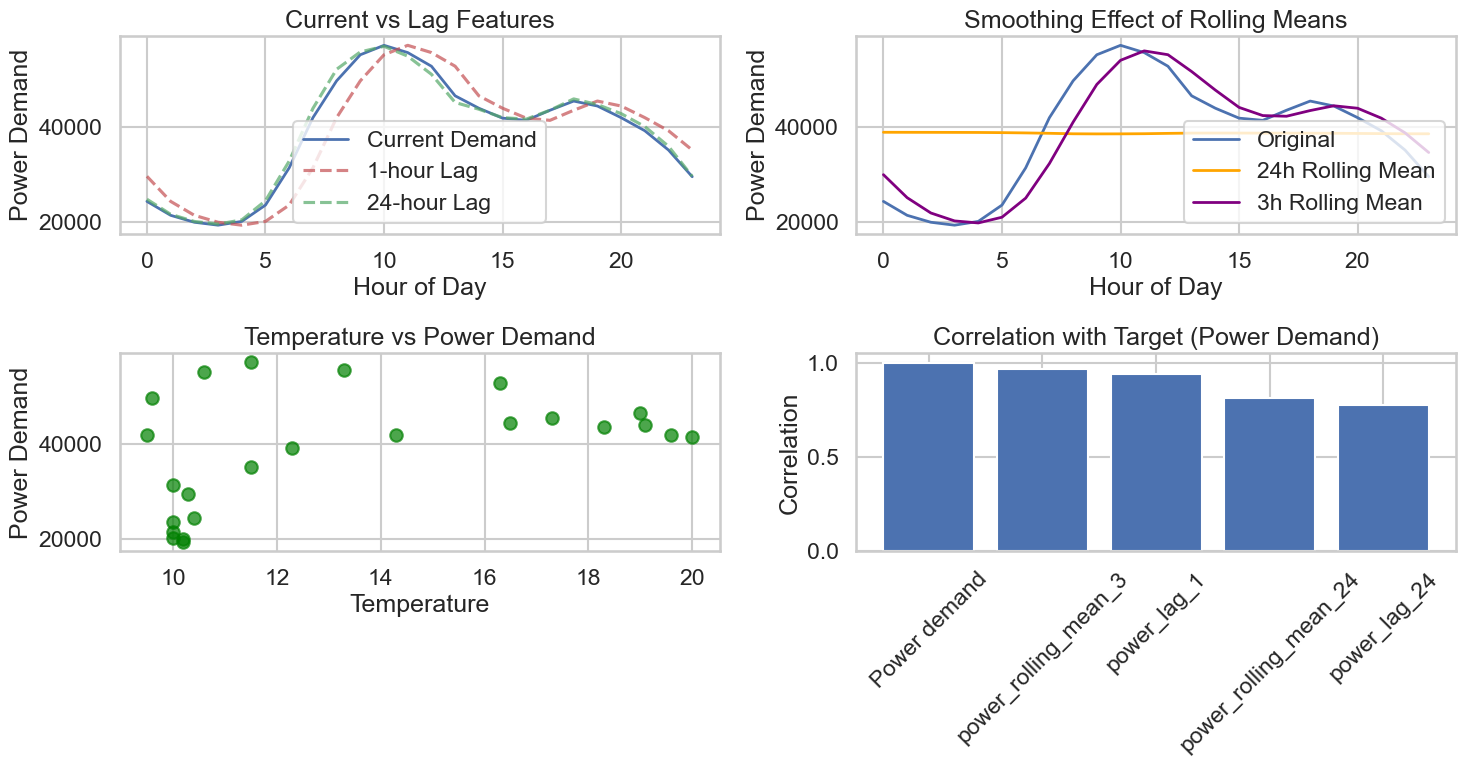


=== CORRELATION WITH TARGET ===
Power demand             1.000
power_rolling_mean_3     0.968
power_lag_1              0.940
power_rolling_mean_24    0.812
power_lag_24             0.778
Name: Power demand, dtype: float64


In [93]:
# ===== PRACTICAL EXAMPLE: Understanding Lag and Rolling Features =====

# Let's look at a specific time period to understand these features
example_data = df[df['datetime'].dt.date == pd.to_datetime('2021-01-15').date()].copy()

# Add hour feature for plotting (extract from datetime)
example_data['hour'] = example_data['datetime'].dt.hour

# Create a comparison DataFrame showing original vs engineered features
available_columns = ['datetime', 'Power demand', 'power_lag_1', 'power_lag_24']
if 'power_rolling_mean_24' in df.columns:
    available_columns.append('power_rolling_mean_24')

comparison_df = example_data[available_columns].head(10)

print("=== FEATURE COMPARISON FOR 2021-01-15 (First 10 hours) ===")
print(comparison_df.round(2))

print("\n=== INTERPRETATION ===")
print("• power_lag_1: Power demand 1 hour ago")
print("• power_lag_24: Power demand 24 hours ago (same time yesterday)")
if 'power_rolling_mean_24' in df.columns:
    print("• power_rolling_mean_24: Average demand over last 24 hours")
if 'power_rolling_mean_3' in df.columns:
    print("• power_rolling_mean_3: Average demand over last 3 hours")

# Visualize the relationship
plt.figure(figsize=(15, 8))

# Plot 1: Original vs Lag features
plt.subplot(2, 2, 1)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Current Demand', linewidth=2)
plt.plot(example_data['hour'], example_data['power_lag_1'], 'r--', label='1-hour Lag', alpha=0.7)
plt.plot(example_data['hour'], example_data['power_lag_24'], 'g--', label='24-hour Lag', alpha=0.7)
plt.title('Current vs Lag Features')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 2: Rolling mean smoothing effect (if available)
plt.subplot(2, 2, 2)
plt.plot(example_data['hour'], example_data['Power demand'], 'b-', label='Original', linewidth=2)
if 'power_rolling_mean_24' in example_data.columns:
    plt.plot(example_data['hour'], example_data['power_rolling_mean_24'], 'orange', label='24h Rolling Mean', linewidth=2)
if 'power_rolling_mean_3' in example_data.columns:
    plt.plot(example_data['hour'], example_data['power_rolling_mean_3'], 'purple', label='3h Rolling Mean', linewidth=2)
plt.title('Smoothing Effect of Rolling Means')
plt.xlabel('Hour of Day')
plt.ylabel('Power Demand')
plt.legend()
plt.grid(True)

# Plot 3: Temperature vs Power Demand
plt.subplot(2, 2, 3)
if 'temp' in example_data.columns:
    plt.scatter(example_data['temp'], example_data['Power demand'], alpha=0.7, color='green')
    plt.xlabel('Temperature')
    plt.ylabel('Power Demand')
    plt.title('Temperature vs Power Demand')
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'Temperature data not available', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title('Temperature Analysis (Not Available)')

# Plot 4: Correlation with target (using available features)
plt.subplot(2, 2, 4)
correlation_features = ['Power demand', 'power_lag_1', 'power_lag_24']
if 'power_rolling_mean_24' in df.columns:
    correlation_features.append('power_rolling_mean_24')
if 'power_rolling_mean_3' in df.columns:
    correlation_features.append('power_rolling_mean_3')

correlations = df[correlation_features].corr()['Power demand'].sort_values(ascending=False)
plt.bar(range(len(correlations)), correlations.values)
plt.xticks(range(len(correlations)), correlations.index, rotation=45)
plt.title('Correlation with Target (Power Demand)')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n=== CORRELATION WITH TARGET ===")
print(correlations.round(3))